In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("/content/breast-cancer.csv")

In [3]:
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (455, 31)
Test set shape: (114, 31)


In [18]:
svm_linear = SVC(kernel="linear", C=1, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear Kernel SVM Results
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [19]:
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(" RBF Kernel SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

 RBF Kernel SVM Results
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [9]:
def quick_cv(model, X, y, runs=3, test_size=0.2):
    scores = []
    for i in range(runs):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=i, stratify=y
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return scores, np.mean(scores)



In [25]:
X_vis, y_vis = make_classification(n_samples=100, n_features=2,
                                   n_classes=2, n_redundant=0, random_state=42)

svm_linear_vis = SVC(kernel="linear", C=1)
svm_linear_vis.fit(X_vis, y_vis)


SVC(C=1, kernel='linear')

In [26]:
svm_rbf_vis = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf_vis.fit(X_vis, y_vis)

SVC(C=1)

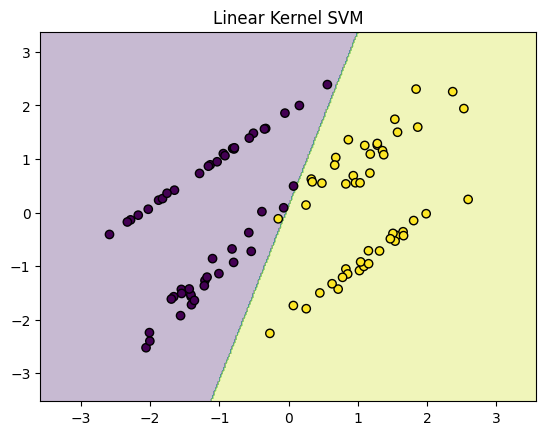

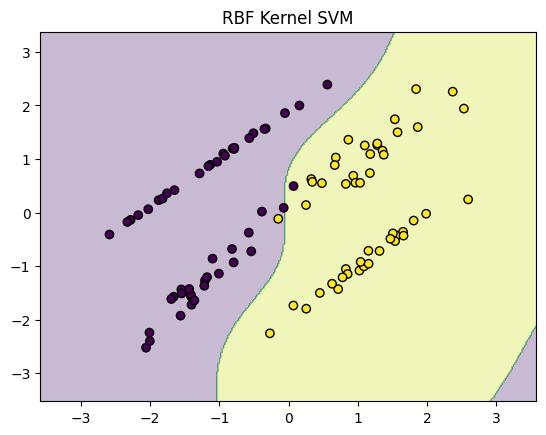

In [27]:
def plot_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.show()

plot_boundary(svm_linear_vis, X_vis, y_vis, "Linear Kernel SVM")
plot_boundary(svm_rbf_vis, X_vis, y_vis, "RBF Kernel SVM")



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print(" Best Cross-Validation Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n Test Set Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
 Best Cross-Validation Accuracy: 0.9780120831881027

 Test Set Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

